In [1]:
import sys
sys.path.insert(0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#importing the dataset
X , y = mglearn.datasets.make_forge()

In [5]:
#details of X
print("Shape of X : \n" , X.shape)
print("Shape of y : \n" , y.shape)

Shape of X : 
 (26, 2)
Shape of y : 
 (26,)


In [6]:
#plotting the graph depicting the knn classification
from sklearn.metrics import euclidean_distances

In [7]:
#this function is used to plot the data set
def plot_dataset() :
    #this is to plot the training set
    pos_indices = (y == 1)
    pos_data = np.ones((0 , 2))
    neg_data = np.ones((0 , 2))
    for indices in range(X.shape[0]):
        if (pos_indices[indices] == True):
            pos_data = np.vstack ((pos_data , np.array([X[indices][0] , X[indices][1]])))
        else:
            neg_data = np.vstack ((neg_data , np.array([X[indices][0] , X[indices][1]])))

    plt.plot(pos_data[: , 0] , pos_data[: , 1] , 'r^' , label = "class 1")
    plt.plot(neg_data[: , 0] , neg_data[: , 1] , 'bo' , label = "class 0")

    plt.xlabel("First feature")
    plt.ylabel("second feature")

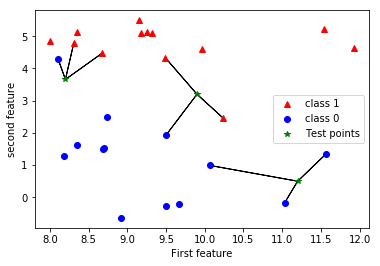

In [8]:
X_test = np.array([[8.2 , 3.66] , [9.9 , 3.2] , [11.2 , 0.5]])

dist = euclidean_distances(X , X_test)               #pairwise distace between each pair of test set and X
closest = np.argsort(dist , axis = 0)                #this will give you the indices of the closest neighbors

#plotting the data set
plot_dataset()
plt.plot(X_test[: , 0] , X_test[: , 1] , 'g*' , label = 'Test points')
plt.legend()

#plotting the k nearest neighborst showing them with the arrows
K = 3                                                   #this is the value that controls the number of negibors
for k in range(K):
    for indices , x in zip(range(3) , X_test):
        plt.arrow(x[0] , x[1] , X[closest[k , indices] , 0] - x[0] , X[closest[k , indices] , 1] - x[1])
                                       #this is the function to plot the dataset

In [9]:
#applying the K-nearest neighbor with the help of scikit_learn
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y)

In [10]:
print("shape of X_train : " , X_train.shape)
print("Shape of X_test : " , X_test.shape)

shape of X_train :  (19, 2)
Shape of X_test :  (7, 2)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [12]:
#fitting the training data
knn.fit(X_train , y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
#predicting the output on the test set
knn.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0])

In [14]:
#to see how well the model generalise call the score method
print("Test set accuracy : " , knn.score(X_test , y_test))

Test set accuracy :  0.8571428571428571


In [15]:
#plotting with the different value of K's
#this is the way plot the descision boundary for k = 1
def plot_descision_boundary (k):
    eps = 0.5
    x_min , x_max = X[: , 0].min() - eps , X[:, 0].max() + eps
    y_min , y_max = X[: , 1].min() - eps , X[: , 1].max() + eps

    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train , y_train)

    xx = np.linspace(x_min , x_max , 1000)
    yy = np.linspace(y_min , y_max , 1000)
    X1 , X2 = np.meshgrid(xx , yy)
    X_grid = np.c_[X1.ravel() , X2.ravel()]
    descision_values = clf.predict(X_grid)

    #plotting the data set
    plot_dataset()
    plt.contourf(X1 , X2 , descision_values.reshape(X1.shape) , alpha = 0.5)

Text(0.5,1,'1 Neighbor')

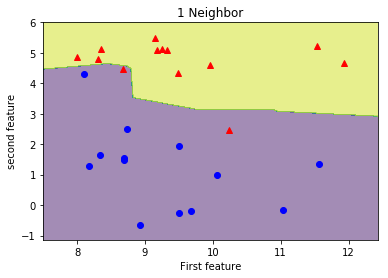

In [16]:
#plotting for different values of k
#this shows the effect of changing the value of k
plot_descision_boundary(1)
plt.title("1 Neighbor")

Text(0.5,1,'1 Neighbors')

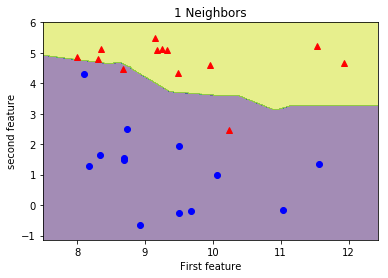

In [17]:
plot_descision_boundary(2)
plt.title("1 Neighbors")

Text(0.5,1,'3 Neighbors')

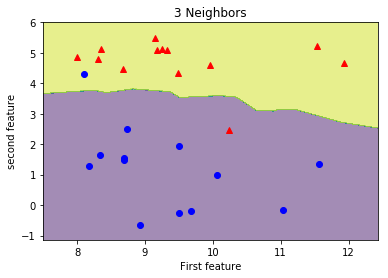

In [18]:
plot_descision_boundary(3)
plt.title("3 Neighbors")

Text(0.5,1,'3 Neighbors')

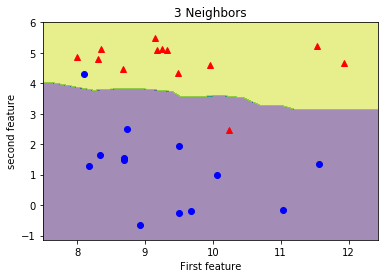

In [19]:
plot_descision_boundary(4)
plt.title("3 Neighbors")

In [20]:
#now working with the breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [21]:
print("The keys are :\n" , cancer.keys()  )

The keys are :
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [22]:
print("Shape of data is : \n" , cancer.data.shape)
print("Shape of target is : \n" , cancer.target.shape)

Shape of data is : 
 (569, 30)
Shape of target is : 
 (569,)


In [23]:
#splitting the dataset into training and test dataset
#setting the value of stratify equal to make cancer.target will make sure that the proportion of samples is same
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target,
                                                       stratify = cancer.target , random_state = 66)

In [24]:
print("Training set shape : \n" , X_train.shape)
print("Test set shape : \n" , X_test.shape)

Training set shape : 
 (426, 30)
Test set shape : 
 (143, 30)


In [25]:
#now analyzing the k-neighbor-algorithm for different value of k
training_accuracy = []
test_accuracy = []

#try n_neighbors from 1 to 10
neighbors_settings = range(1 ,11)
for neighbors in neighbors_settings:
    #building the model
    clf = KNeighborsClassifier(n_neighbors = neighbors)
    clf.fit(X_train , y_train)
    
    #storing the test and training set accuracy
    training_accuracy.append(clf.score(X_train , y_train))
    test_accuracy.append(clf.score(X_test , y_test))

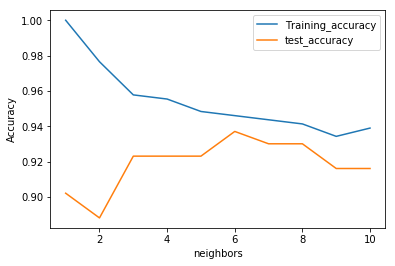

In [26]:
#plotting the graph
#having fewer neighbors means more complex model , so the model tend to overfit
#when the number of neighbors increase , the model becomes simpler so the overfit tendency decrease
plt.plot(neighbors_settings , training_accuracy , label = "Training_accuracy")
plt.plot(neighbors_settings , test_accuracy , label = "test_accuracy")
plt.xlabel("neighbors")
plt.ylabel("Accuracy")
plt.legend()

In [27]:
#the rest of the block deals with the k_neigbors regression model
#THIS TIME USE THE WAVE DATASET
X_wave , y_wave = mglearn.datasets.make_wave(n_samples = 40)

Shape of X_wave is : 
 (40, 1)
Shape of y_wave is : 
 (40,)


Text(0,0.5,'Target')

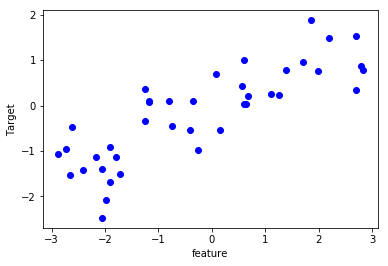

In [28]:
#plotting the data
print("Shape of X_wave is : \n" , X_wave.shape)
print("Shape of y_wave is : \n"  , y_wave.shape)
plt.plot(X_wave , y_wave , 'bo')
plt.xlabel("feature")
plt.ylabel("Target")

Text(0.5,1,'regression')

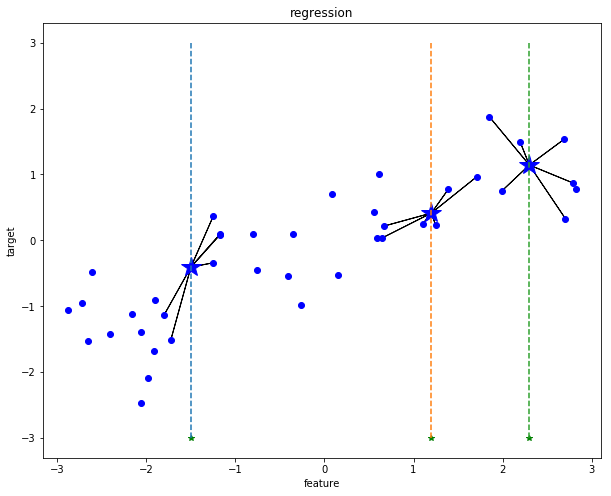

In [29]:
#this is the simple illustration of the k-nearest-neighbor regression

#this shows how the k_neighbors work for regression
X_test = [-1.5, 1.2 , 2.3]

#setting the size of the figure
plt.figure(figsize = (10 , 8))

#for the purpose of plotting
yy = np.linspace (-3, 3 , 1000)
xx = np.ones(yy.shape)
plt.plot(X_test , np.ones(( len(X_test) , 1)) * -3 , 'g*')

#finding the distance in between different points
dist = np.zeros((X_wave.shape[0]  , len(X_test)))
for i in range(X_wave.shape[0]):
    for j in range(len(X_test)):
        dist[i , j] = abs(X_wave[i] - X_test[j])


#fiding the closest points
closest = np.argsort(dist , axis= 0)
K = 6

#this is to plot the arrows
for indices , x in zip(range(3) , X_test):
    y_pred = 0
    for k in range(K):
        y_pred += y_wave[closest[k , indices]]
    y_pred = y_pred/K
    plt.plot(x , y_pred, 'b*' , markersize = 20)
    for k in range(K):
        plt.arrow(x , y_pred , X_wave[closest[k , indices]][0] - x , y_wave[closest[k, indices]] - y_pred )


#plotting the data points
plt.plot(X_wave , y_wave , 'bo' )

#plotting the dashed lines
for x in X_test:
    plt.plot(x*xx , yy , '--' )

#Putting additional features
plt.xlabel("feature")
plt.ylabel("target")
plt.title("regression")

In [30]:
#implenting the k-nearest-neighbors regressor
from sklearn.neighbors import KNeighborsRegressor

In [31]:
#splitting the data set
X_train , X_test , y_train , y_test = train_test_split(X_wave , y_wave , random_state = 0)

In [32]:
#details of the train and test sets
print("Shape of X_train : \n" , X_train.shape)
print("Shape of y_train : \n" , y_train.shape)

Shape of X_train : 
 (30, 1)
Shape of y_train : 
 (30,)


In [33]:
#fitting the model
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train , y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [34]:
#printing the test set predictions
print("Test set predictions : \n", reg.predict(X_test))

Test set predictions : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [35]:
#model can be evaluated with the help of the r2 score
#it is a way to predict how well the model fits 
#0 value means very bad prediction , 1 value means perfect prediction
print("Score of the model is : " , reg.score(X_test , y_test))

Score of the model is :  0.8344172446249604


In [36]:
#analysis of the data
def plot_regressor (K):
    reg = KNeighborsRegressor(n_neighbors = K)
    reg.fit(X_train , y_train)
    
    plt.plot(X_train , y_train , 'bo' , label = 'Training')
    plt.plot(X_test , y_test , 'r^' , label = 'Test')

    line = np.linspace (-3 , 3 , 1000).reshape(1000 , 1)
    y_pred = reg.predict(line)
    plt.plot(line , y_pred , label = 'Predictions')


    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    a = 'Train accuracy ' , reg.score(X_train , y_train) , ' Test accuracy ' , reg.score(X_test , y_test)
    plt.title(a )

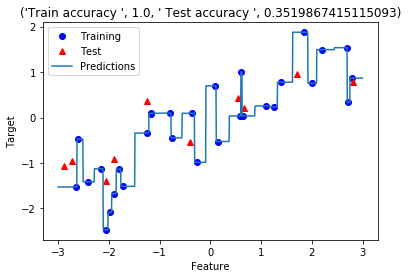

In [37]:
plot_regressor(1)

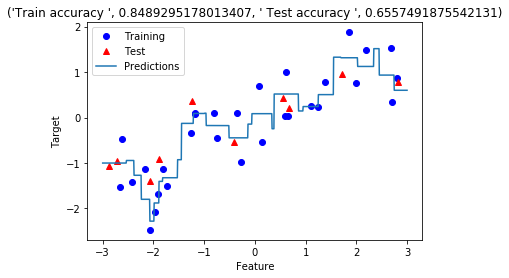

In [38]:
plot_regressor(2)

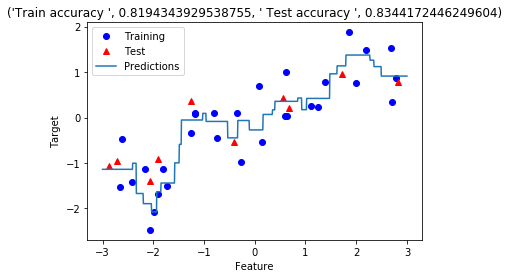

In [39]:
plot_regressor(3)

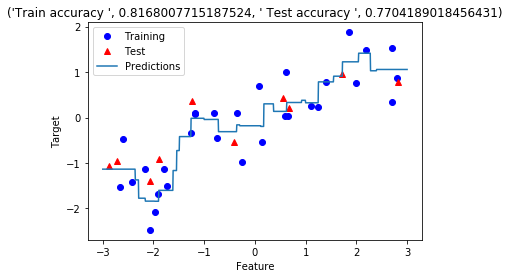

In [40]:
plot_regressor(4)

In [41]:
#the k-neigbors-classifier and regressor do not work well when number of features is large and data is sparse